In [18]:
import rasterio
from rasterio import plot
import numpy as np

def display_NDVI(b4,b8):
    band4 = rasterio.open(b4) 
    band8 = rasterio.open(b8)
    
    red = band4.read(1).astype('float64')
    nir = band8.read(1).astype('float64')

    ndvi = np.where(
    (nir+red)==0.,
    0,
    (nir-red)/(nir+red)
    )

    band4.close()
    band8.close()

    plot.show(ndvi)

In [ ]:
display_NDVI('input/KhonKaen_Left_B04.tiff','input/KhonKaen_Left_B08.tiff')

In [ ]:
display_NDVI('input/KhonKaen_Right_B04.tiff','input/KhonKaen_RIGHT_B08.tiff')

In [ ]:
display_NDVI('output/KhonKaen_B04.tiff','output/KhonKaen_B08.tiff')

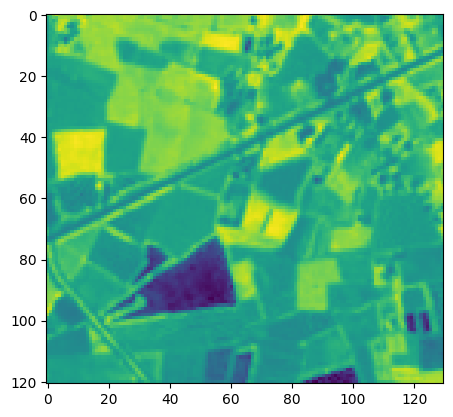

In [20]:
display_NDVI('suphanburi_rice_1/Band_04.tiff','suphanburi_rice_1/Band_08.tiff')

In [ ]:
import rasterio
from rasterio.merge import merge
import geopandas as gpd
from rasterio.plot import show

def mergeRaster(first,second,out_file):
    firstImg = rasterio.open(first)
    secImg = rasterio.open(second)

    dest, output_transform=merge([firstImg,secImg], precision=7)

    out_meta = firstImg.meta

    out_meta.update({"driver": "GTiff",
                    "height": dest.shape[1],
                    "width": dest.shape[2],
                    "transform": output_transform})

    with rasterio.open(out_file, "w", **out_meta) as dest1:
        dest1.write(dest)

    firstImg.close()
    secImg.close()

    with rasterio.open(out_file) as src:
        show(src)

In [ ]:
mergeRaster("input/KhonKaen_Left_B04.tiff","input/KhonKaen_Right_B04.tiff","output/KhonKaen_B04.tiff")

In [ ]:
mergeRaster("input/KhonKaen_Left_B08.tiff","input/KhonKaen_Right_B08.tiff","output/KhonKaen_B08.tiff")

In [30]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.plot import show

def clipMask(raster,shapefile,out_file):
    thailand = gpd.read_file(shapefile)
    khonkaen = thailand[thailand['ADM1_TH'] == 'ขอนแก่น']
    
    with rasterio.open(raster) as src:
        clipped_data, clipped_transform = mask(src, khonkaen.geometry, crop=True, invert=False)
        out_meta = src.meta

    out_meta.update({"driver": "GTiff",
                    "height": clipped_data.shape[1],
                    "width": clipped_data.shape[2],
                    "transform": clipped_transform})

    with rasterio.open(out_file, "w", **out_meta) as src:
        src.write(clipped_data)

    with rasterio.open(out_file) as src:
        show(src)
    

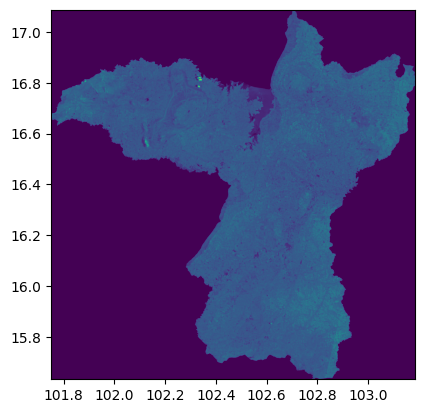

In [34]:
clipMask('output/KhonKaen_B08.tiff','tha_adm_shapefile/tha_admbnda_adm1_rtsd_20190221.shp','output/clip_KhonKaen_B08.tif')

/tmp/ipykernel_517/4204290048.py:15: RuntimeWarning: invalid value encountered in divide
  (nir-red)/(nir+red)


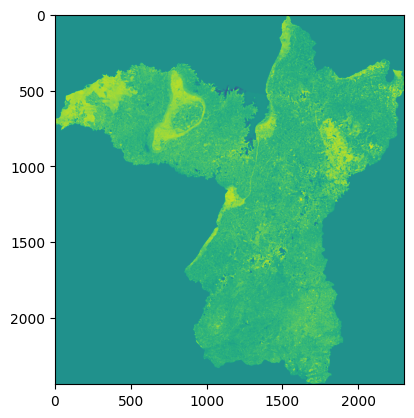

In [35]:
display_NDVI('output/clip_KhonKaen_B04.tif','output/clip_KhonKaen_B08.tif')

In [ ]:
def download_img():
    pass